In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from numpy import mean
from numpy import std

from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.neural_network import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import *

import math

### Clean data and join with feature fields

In [ ]:
#  https://www.kaggle.com/arashnic/fitbit
df = pd.read_csv('/work/sleepDay_merged.csv')
df["diff"] = 100 * df['TotalMinutesAsleep'].div(df['TotalTimeInBed'])
df["sleepQuality"] = df["diff"].apply(lambda x: 1 if x > 90 else 0)
df['ActivityDate'] = pd.to_datetime(df['SleepDay']).dt.date

dailyactivity = pd.read_csv('/work/dailyActivity_merged.csv')
dailyactivity['ActivityDate'] = pd.to_datetime(dailyactivity['ActivityDate']).dt.date
df = dailyactivity.merge(df, on = ["Id","ActivityDate"], how = "inner")

df["Id"].nunique()



24

### Training Examples with Target Concept

In [ ]:
X = df.drop(['sleepQuality', 
    "ActivityDate", 
    "SleepDay", 
    "TotalSleepRecords",
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y = df["sleepQuality"] # target output 



### Train once using RandomForest

In [ ]:
# split the dataset into 80% training set, 20% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# train random forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# test random forest model
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

# evaluate random forest model
# evaluate model using accuracy_score
rf_train_frac_cor = accuracy_score(y_train, y_rf_train_pred)
rf_test_frac_cor = accuracy_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random forest',rf_train_frac_cor, rf_test_frac_cor]).transpose()
rf_results.columns = ['Method','#Correct in Training','#Correct in Test']

# display results in table format
results = rf_results
display(results)

predictions = rf.predict(X_test)
predictions

predictions_df=pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
# predictions_df
pd.DataFrame({'features': np.array(X.columns), 'importance': rf.feature_importances_})


Method #Correct in Training #Correct in Test
0  Random forest             0.884848         0.807229

features  importance
0                 TotalSteps    0.093894
1              TotalDistance    0.078454
2            TrackerDistance    0.062046
3   LoggedActivitiesDistance    0.001947
4         VeryActiveDistance    0.031884
5   ModeratelyActiveDistance    0.161816
6        LightActiveDistance    0.079182
7    SedentaryActiveDistance    0.000260
8          VeryActiveMinutes    0.042648
9        FairlyActiveMinutes    0.137967
10      LightlyActiveMinutes    0.056532
11          SedentaryMinutes    0.070561
12                  Calories    0.182808

In [ ]:
X_test

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
394        8382           6.65             6.65                  2.092147   
349       10387           7.07             7.07                  0.000000   
400        1219           0.78             0.78                  0.000000   
353       12390           8.07             8.07                  0.000000   
181        4676           3.14             3.14                  0.000000   
..          ...            ...              ...                       ...   
287        5153           3.91             3.91                  0.000000   
322       12627           8.35             8.35                  0.000000   
202        7860           6.37             6.37                  0.000000   
274        6805           5.14             5.14                  0.000000   
389        7875           6.24             6.24                  0.000000   

     VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
394                1.27                      0.66                 4.72   
349                4.16                      0.77                 2.12   
400                0.00                      0.00                 0.78   
353                2.30                      0.90                 4.85   
181                0.00                      0.00                 3.13   
..                  ...                       ...                  ...   
287                0.00                      0.00                 3.89   
322                2.51                      0.24                 5.59   
202                0.00                      0.00                 6.37   
274                1.81                      0.40                 2.93   
389                1.56                      0.49                 4.20   

     SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
394                      0.0                 71                   13   
349                      0.0                 70                   33   
400                      0.0                  0                    0   
353                      0.0                 30                   15   
181                      0.0                  0                    0   
..                       ...                ...                  ...   
287                      0.0                  0                    0   
322                      0.0                 38                    8   
202                      0.0                  0                    0   
274                      0.0                 63                   16   
389                      0.0                 19                   10   

     LightlyActiveMinutes  SedentaryMinutes  Calories  
394                   171               772      3721  
349                   132               726      2781  
400                    84               853      1963  
353                   258               685      2730  
181                   226              1106      2196  
..                    ...               ...       ...  
287                   241               759      2018  
322                   288               621      2182  
202                   271               772      2984  
274                   190               773      3294  
389                   167               680      3110  

[83 rows x 13 columns]

In [ ]:
X_train

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
238       11682           7.63             7.63                       0.0   
5         15506           9.88             9.88                       0.0   
45         2467           1.53             1.53                       0.0   
110        1982           1.42             1.42                       0.0   
258        3121           2.04             2.04                       0.0   
..          ...            ...              ...                       ...   
71         6711           4.44             4.44                       0.0   
106       11550           7.73             7.73                       0.0   
270        7638           5.71             5.71                       0.0   
348       10091           6.82             6.82                       0.0   
102       14335           9.59             9.59                       0.0   

     VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
238                1.38                      0.63                 5.60   
5                  3.53                      1.32                 5.03   
45                 0.00                      0.00                 1.53   
110                0.45                      0.37                 0.59   
258                0.58                      0.40                 1.06   
..                  ...                       ...                  ...   
71                 0.00                      0.00                 4.44   
106                0.00                      4.13                 3.59   
270                1.21                      0.36                 4.14   
348                3.75                      0.70                 2.37   
102                3.32                      1.74                 4.53   

     SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
238                      0.0                 25                   16   
5                        0.0                 50                   31   
45                       0.0                  0                    0   
110                      0.0                 65                   21   
258                      0.0                  8                    6   
..                       ...                ...                  ...   
71                       0.0                  0                    7   
106                      0.0                  0                   86   
270                      0.0                 24                   24   
348                      0.0                 69                   39   
102                      0.0                 47                   41   

     LightlyActiveMinutes  SedentaryMinutes  Calories  
238                   270               781      2105  
5                     264               775      2035  
45                    153               749      1370  
110                    55              1222      3051  
258                    48               222       741  
..                    ...               ...       ...  
71                    382               648      2346  
106                   208               703      1574  
270                   223               627      3152  
348                   129               706      2752  
102                   258               594      1710  

[330 rows x 13 columns]

### Validate using k-folds

In [ ]:
# takes in a model and uses k fold cross validation to evaluate the model
# outputs the mean and standard deviation
def kFoldCrossValidation(model):
    # https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    # report performance
    print('k-folds: Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
df

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162           8.50             8.50   
1    1503960366   2016-04-13       10735           6.97             6.97   
2    1503960366   2016-04-15        9762           6.28             6.28   
3    1503960366   2016-04-16       12669           8.16             8.16   
4    1503960366   2016-04-17        9705           6.48             6.48   
..          ...          ...         ...            ...              ...   
408  8792009665   2016-04-30        7174           4.59             4.59   
409  8792009665   2016-05-01        1619           1.04             1.04   
410  8792009665   2016-05-02        1831           1.17             1.17   
411  8792009665   2016-05-03        2421           1.55             1.55   
412  8792009665   2016-05-04        2283           1.46             1.46   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.14                      1.26   
3                         0.0                2.71                      0.41   
4                         0.0                3.19                      0.78   
..                        ...                 ...                       ...   
408                       0.0                0.33                      0.36   
409                       0.0                0.00                      0.00   
410                       0.0                0.00                      0.00   
411                       0.0                0.00                      0.00   
412                       0.0                0.00                      0.00   

     LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0                   6.06                      0.0  ...                   13   
1                   4.71                      0.0  ...                   19   
2                   2.83                      0.0  ...                   34   
3                   5.04                      0.0  ...                   10   
4                   2.51                      0.0  ...                   20   
..                   ...                      ...  ...                  ...   
408                 3.91                      0.0  ...                   20   
409                 1.04                      0.0  ...                    0   
410                 1.17                      0.0  ...                    0   
411                 1.55                      0.0  ...                    0   
412                 1.46                      0.0  ...                    0   

     LightlyActiveMinutes  SedentaryMinutes  Calories               SleepDay  \
0                     328               728      1985  4/12/2016 12:00:00 AM   
1                     217               776      1797  4/13/2016 12:00:00 AM   
2                     209               726      1745  4/15/2016 12:00:00 AM   
3                     221               773      1863  4/16/2016 12:00:00 AM   
4                     164               539      1728  4/17/2016 12:00:00 AM   
..                    ...               ...       ...                    ...   
408                   301               749      2896  4/30/2016 12:00:00 AM   
409                    79               834      1962   5/1/2016 12:00:00 AM   
410                   101               916      2015   5/2/2016 12:00:00 AM   
411                   156               739      2297   5/3/2016 12:00:00 AM   
412                   129               848      2067   5/4/2016 12:00:00 AM   

    TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed       diff  \
0                   1                 327             346  94.508671   
1                   2                 384             407  94.348894   
2                   1    

### Validate using Stratified k-folds

In [ ]:
# takes in a model and uses stratified k fold cross validation to evaluate the model
# outputs the mean and standard deviation
def stratifiedKFold(model):
    # https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
    # prepare the cross-validation procedure
    skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

    scores = []
    # evaluate model
    for train_index, test_index in skf.split(X, y):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)

        # test random forest model
        y_rf_test_pred = model.predict(X_test)

        # evaluate model using accuracy_score
        rf_test_frac_cor = accuracy_score(y_test, y_rf_test_pred)

        scores.append(rf_test_frac_cor)

    # report performance
    print('Stratified k-folds: Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

### Random Forests
Using the binary classification (>90%)

In [ ]:
rf = RandomForestClassifier(max_depth=5, random_state=42)
kFoldCrossValidation(rf)
stratifiedKFold(rf)

# Testing different heights
for i in range(1, 11):
    print(i)
    rf = RandomForestClassifier(max_depth=i, random_state=42)
    kFoldCrossValidation(rf)
    stratifiedKFold(rf)

k-folds: Accuracy: 0.850 (0.035)
Stratified k-folds: Accuracy: 0.843 (0.029)
1
k-folds: Accuracy: 0.804 (0.041)
Stratified k-folds: Accuracy: 0.806 (0.018)
2
k-folds: Accuracy: 0.828 (0.023)
Stratified k-folds: Accuracy: 0.828 (0.022)
3
k-folds: Accuracy: 0.835 (0.031)
Stratified k-folds: Accuracy: 0.833 (0.022)
4
k-folds: Accuracy: 0.840 (0.028)
Stratified k-folds: Accuracy: 0.845 (0.033)
5
k-folds: Accuracy: 0.850 (0.035)
Stratified k-folds: Accuracy: 0.843 (0.029)
6
k-folds: Accuracy: 0.850 (0.037)
Stratified k-folds: Accuracy: 0.843 (0.027)
7
k-folds: Accuracy: 0.850 (0.031)
Stratified k-folds: Accuracy: 0.840 (0.025)
8
k-folds: Accuracy: 0.855 (0.033)
Stratified k-folds: Accuracy: 0.850 (0.030)
9
k-folds: Accuracy: 0.850 (0.029)
Stratified k-folds: Accuracy: 0.850 (0.037)
10
k-folds: Accuracy: 0.850 (0.031)
Stratified k-folds: Accuracy: 0.847 (0.035)


### Decision Tree
Using the binary classification (>90%)

In [ ]:
dtree = DecisionTreeClassifier(random_state=1)
kFoldCrossValidation(dtree)
stratifiedKFold(dtree)

k-folds: Accuracy: 0.753 (0.037)
Stratified k-folds: Accuracy: 0.741 (0.050)


### Multi Layer Perceptron Neural Network
Using the binary classification (>90%)

In [ ]:
# activation = logistic is the best, converge after 1000 iters
nn = MLPClassifier(random_state=1, activation='logistic', max_iter=1000)
kFoldCrossValidation(nn)
stratifiedKFold(nn)

k-folds: Accuracy: 0.814 (0.049)
Stratified k-folds: Accuracy: 0.801 (0.022)


### Stochastic Gradient Descent
Using the binary classification (>90%)

In [ ]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
kFoldCrossValidation(sgd)
stratifiedKFold(sgd)

k-folds: Accuracy: 0.780 (0.062)
Stratified k-folds: Accuracy: 0.799 (0.052)


In [ ]:
rfr = RandomForestRegressor(max_depth=5, random_state=42)

### Experimental: Using LIME

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test.iloc[34], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
X_test.iloc[34]

TotalSteps                   356.00
TotalDistance                  0.25
TrackerDistance                0.25
LoggedActivitiesDistance       0.00
VeryActiveDistance             0.00
ModeratelyActiveDistance       0.00
LightActiveDistance            0.25
SedentaryActiveDistance        0.00
VeryActiveMinutes              0.00
FairlyActiveMinutes            0.00
LightlyActiveMinutes          32.00
SedentaryMinutes             986.00
Calories                    2151.00
Name: 33, dtype: float64

In [ ]:
X_train

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
238       11682           7.63             7.63                       0.0   
5         15506           9.88             9.88                       0.0   
45         2467           1.53             1.53                       0.0   
110        1982           1.42             1.42                       0.0   
258        3121           2.04             2.04                       0.0   
..          ...            ...              ...                       ...   
71         6711           4.44             4.44                       0.0   
106       11550           7.73             7.73                       0.0   
270        7638           5.71             5.71                       0.0   
348       10091           6.82             6.82                       0.0   
102       14335           9.59             9.59                       0.0   

     VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
238                1.38                      0.63                 5.60   
5                  3.53                      1.32                 5.03   
45                 0.00                      0.00                 1.53   
110                0.45                      0.37                 0.59   
258                0.58                      0.40                 1.06   
..                  ...                       ...                  ...   
71                 0.00                      0.00                 4.44   
106                0.00                      4.13                 3.59   
270                1.21                      0.36                 4.14   
348                3.75                      0.70                 2.37   
102                3.32                      1.74                 4.53   

     SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
238                      0.0                 25                   16   
5                        0.0                 50                   31   
45                       0.0                  0                    0   
110                      0.0                 65                   21   
258                      0.0                  8                    6   
..                       ...                ...                  ...   
71                       0.0                  0                    7   
106                      0.0                  0                   86   
270                      0.0                 24                   24   
348                      0.0                 69                   39   
102                      0.0                 47                   41   

     LightlyActiveMinutes  SedentaryMinutes  Calories  
238                   270               781      2105  
5                     264               775      2035  
45                    153               749      1370  
110                    55              1222      3051  
258                    48               222       741  
..                    ...               ...       ...  
71                    382               648      2346  
106                   208               703      1574  
270                   223               627      3152  
348                   129               706      2752  
102                   258               594      1710  

[330 rows x 13 columns]

### Deprecated Code (e.g. Linear Regression)

In [ ]:

X = df.drop(['sleepQuality', 
    "ActivityDate", 
    "SleepDay", 
    "TotalSleepRecords",
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y = df["sleepQuality"] # target output 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# train linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# test linear regression model
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

# evaluate linear regression model using mean squared error (MSE) and coefficient of determination  (r2)
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results


Method Training MSE Training R2  Test MSE   Test R2
0  Linear regression     0.127648    0.163405  0.191668 -0.047937

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        413 non-null    int64  
 1   ActivityDate              413 non-null    object 
 2   TotalSteps                413 non-null    int64  
 3   TotalDistance             413 non-null    float64
 4   TrackerDistance           413 non-null    float64
 5   LoggedActivitiesDistance  413 non-null    float64
 6   VeryActiveDistance        413 non-null    float64
 7   ModeratelyActiveDistance  413 non-null    float64
 8   LightActiveDistance       413 non-null    float64
 9   SedentaryActiveDistance   413 non-null    float64
 10  VeryActiveMinutes         413 non-null    int64  
 11  FairlyActiveMinutes       413 non-null    int64  
 12  LightlyActiveMinutes      413 non-null    int64  
 13  SedentaryMinutes          413 non-null    int64  
 14  Calories  

Text(0.5, 0, 'Experimental LogS')

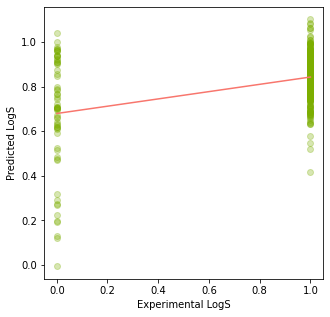

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)
z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train,p(y_train),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

### Clean data based on hourly data and join with Sleep Quality

In [ ]:
#  https://www.kaggle.com/arashnic/fitbit
df2 = pd.read_csv('/work/sleepDay_merged.csv')
df2["diff"] = 100 * df2['TotalMinutesAsleep'].div(df2['TotalTimeInBed'])
df2["sleepQuality"] = df2["diff"].apply(lambda x: 1 if x > 90 else 0)
df2['Date'] = pd.to_datetime(df2['SleepDay']).dt.date

hourlyactivity = pd.read_csv('/work/hourlyActivity_merged.csv')
hourlyactivity['Date'] = pd.to_datetime(hourlyactivity['Date']).dt.date
df2 = hourlyactivity.merge(df2, on = ["Id","Date"], how = "inner")

## Training Examples with Target Concept

In [ ]:
#(np.where(np.isnan(df2)))

df2=(df2.dropna()) #remove NA values as there are some columns containing nan

df2 = df2.reset_index(drop=True)

X2 = df2.drop(['sleepQuality',
    "Unnamed: 0",
    "Date", 
    "SleepDay", 
    "TotalSleepRecords",
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y2 = df2["sleepQuality"] # target output 


X2

Steps at 12:00:00 AM  Steps at 1:00:00 AM  Steps at 2:00:00 AM  \
0                   373.0                160.0                151.0   
1                   144.0                  0.0                  0.0   
2                    83.0                 75.0                124.0   
3                   459.0                  0.0                 63.0   
4                     0.0                  0.0                  0.0   
..                    ...                  ...                  ...   
396                  28.0                 32.0                  0.0   
397                  16.0                  0.0                  0.0   
398                 351.0                227.0                163.0   
399                 130.0                171.0                  0.0   
400                 337.0                 55.0                 34.0   

     Steps at 3:00:00 AM  Steps at 4:00:00 AM  Steps at 5:00:00 AM  \
0                    0.0                  0.0                  0.0   
1                   36.0                  0.0                  0.0   
2                    0.0                  0.0                 26.0   
3                    6.0                  6.0                 12.0   
4                    8.0                  0.0                  0.0   
..                   ...                  ...                  ...   
396                  0.0                  0.0                  0.0   
397                  0.0                  0.0                  0.0   
398                  0.0                  0.0                  0.0   
399                  0.0                  8.0                  0.0   
400                  0.0                  0.0                  0.0   

     Steps at 6:00:00 AM  Steps at 7:00:00 AM  Steps at 8:00:00 AM  \
0                    0.0                  0.0                250.0   
1                    0.0                126.0                275.0   
2                    0.0                  7.0                 55.0   
3                    0.0                101.0                175.0   
4                    0.0                  0.0                  0.0   
..                   ...                  ...                  ...   
396                  0.0                 41.0                 28.0   
397                  0.0                  0.0                 21.0   
398                  0.0                  4.0                  0.0   
399                  6.0                  0.0                  0.0   
400                  0.0                  0.0                  0.0   

     Steps at 9:00:00 AM  ...  Total Intensity at 7:00:00PM  \
0                 1864.0  ...                          39.0   
1                 1679.0  ...                          13.0   
2                   21.0  ...                          32.0   
3                 1181.0  ...                          12.0   
4                    0.0  ...                          24.0   
..                   ...  ...                           ...   
396                518.0  ...                          46.0   
397                  0.0  ...                           3.0   
398                 83.0  ...                           1.0   
399                 22.0  ...                          15.0   
400                 31.0  ...                           1.0   

     Average Intensity at 7:00:00PM  Total Intensity at 8:00:00AM  \
0                          0.650000                          13.0   
1                          0.216667                          12.0   
2                          0.533333                           5.0   
3                          0.200000                           9.0   
4                          0.400000                           0.0   
..                              ...                           ...   
396                        0.766667                           3.0   
397                        0.050000                           2.0   
398                        0.016667                           0.0   
399                    

### Train once using RandomForest

In [ ]:
# split the dataset into 80% training set, 20% test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42)

# train random forest model
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestClassifier(max_depth=5, random_state=42)
rf = XGBClassifier(max_depth=6)
rf.fit(X2_train, y2_train)

# test random forest model
y2_rf_train_pred = rf.predict(X2_train)
y2_rf_test_pred = rf.predict(X2_test)

# evaluate random forest model
# evaluate model using accuracy_score
rf_train_frac_cor = accuracy_score(y2_train, y2_rf_train_pred)
rf_test_frac_cor = accuracy_score(y2_test, y2_rf_test_pred)

rf_results = pd.DataFrame(['Random forest',rf_train_frac_cor, rf_test_frac_cor]).transpose()
rf_results.columns = ['Method','#Correct in Training','#Correct in Test']

# display results in table format
results = rf_results
display(results)

predictions = rf.predict(X2_test)
predictions

predictions_df=pd.DataFrame({'Actual':y2_test, 'Predicted':predictions})
# predictions_df
pd.DataFrame({'features': np.array(X2.columns), 'importance': rf.feature_importances_})


/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[11:13:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Method #Correct in Training #Correct in Test
0  Random forest                  1.0         0.888889

features  importance
0             Steps at 12:00:00 AM    0.015881
1              Steps at 1:00:00 AM    0.019831
2              Steps at 2:00:00 AM    0.021008
3              Steps at 3:00:00 AM    0.022947
4              Steps at 4:00:00 AM    0.048527
..                             ...         ...
91  Average Intensity at 8:00:00PM    0.000000
92    Total Intensity at 9:00:00AM    0.007309
93  Average Intensity at 9:00:00AM    0.000000
94    Total Intensity at 9:00:00PM    0.005106
95  Average Intensity at 9:00:00PM    0.000000

[96 rows x 2 columns]

### Validate using k-folds

In [ ]:
# takes in a modl and uses k fold cross validation to evaluate the model
# outputs the mean and standard deviation
def kFoldCrossValidation2(model):
    # https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
    # prepare the cross-validation procedure
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    # evaluate model
    scores = cross_val_score(model, X2, y2, scoring='accuracy', cv=cv, n_jobs=-1)

    # report performance
    print('k-folds: Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

### Validate Using stratified k-folds

In [ ]:

# takes in a model and uses stratified k fold cross validation to evaluate the model
# outputs the mean and standard deviation
def stratifiedKFold2(model):
    # https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
    # prepare the cross-validation procedure
    skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

    scores = []
    # evaluate model
    for train_index, test_index in skf.split(X2, y2):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2[train_index], y2[test_index]
        model.fit(X2_train, y2_train)

        # test random forest model
        y2_rf_test_pred = model.predict(X2_test)

        # evaluate model using accuracy_score
        rf_test_frac_cor = accuracy_score(y2_test, y2_rf_test_pred)

        scores.append(rf_test_frac_cor)

    # report performance
    print('Stratified k-folds: Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

### Random Forest 2

In [ ]:
rf = RandomForestClassifier(max_depth=7, random_state=42)
kFoldCrossValidation2(rf)
stratifiedKFold2(rf)


for i in range(1, 15):
    print(i)
    rf = RandomForestClassifier(max_depth=i, random_state=42)
    kFoldCrossValidation2(rf)
    stratifiedKFold2(rf)

k-folds: Accuracy: 0.875 (0.062)
Stratified k-folds: Accuracy: 0.870 (0.051)
1
k-folds: Accuracy: 0.868 (0.069)
Stratified k-folds: Accuracy: 0.868 (0.042)
2
k-folds: Accuracy: 0.868 (0.069)
Stratified k-folds: Accuracy: 0.868 (0.042)
3
k-folds: Accuracy: 0.868 (0.069)
Stratified k-folds: Accuracy: 0.865 (0.045)
4
k-folds: Accuracy: 0.870 (0.066)
Stratified k-folds: Accuracy: 0.868 (0.049)
5
k-folds: Accuracy: 0.873 (0.068)
Stratified k-folds: Accuracy: 0.868 (0.049)
6
k-folds: Accuracy: 0.870 (0.066)
Stratified k-folds: Accuracy: 0.868 (0.049)
7
k-folds: Accuracy: 0.875 (0.062)
Stratified k-folds: Accuracy: 0.870 (0.051)
8
k-folds: Accuracy: 0.870 (0.066)
Stratified k-folds: Accuracy: 0.873 (0.052)
9
k-folds: Accuracy: 0.873 (0.063)
Stratified k-folds: Accuracy: 0.870 (0.051)
10
k-folds: Accuracy: 0.870 (0.058)
Stratified k-folds: Accuracy: 0.868 (0.049)
11
k-folds: Accuracy: 0.870 (0.060)
Stratified k-folds: Accuracy: 0.873 (0.049)
12
k-folds: Accuracy: 0.870 (0.058)
Stratified k-fol

### Decision Tree 2 

Using the binary classification (&gt;90%)

In [ ]:
dtree2 = DecisionTreeClassifier(random_state=1)
kFoldCrossValidation2(dtree2)
stratifiedKFold2(dtree2)

k-folds: Accuracy: 0.793 (0.064)
Stratified k-folds: Accuracy: 0.763 (0.066)


### Multi Layer Perceptron Neural Network 2

Using the binary classification (&gt;90%)

In [ ]:
# activation = logistic is the best, converge after 1000 iters
nn = MLPClassifier(random_state=1, activation='logistic', max_iter=1000)
kFoldCrossValidation2(nn)
stratifiedKFold2(nn)

k-folds: Accuracy: 0.790 (0.080)
Stratified k-folds: Accuracy: 0.786 (0.051)


### Stochastic Gradient Descent 2

Using the binary classification (&gt;90%)

In [ ]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
kFoldCrossValidation2(sgd)
stratifiedKFold2(sgd)


k-folds: Accuracy: 0.780 (0.063)
Stratified k-folds: Accuracy: 0.738 (0.057)


In [ ]:
rfr = RandomForestRegressor(max_depth=5, random_state=42)

### Using LIME for df2

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X2_train),
    feature_names=X2_train.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X2_test.iloc[2], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Continous Value

In [ ]:
df2

Unnamed: 0            Id        Date  Steps at 12:00:00 AM  \
0           1.0  1.503960e+09  2016-04-12                 373.0   
1           2.0  1.503960e+09  2016-04-13                 144.0   
2           4.0  1.503960e+09  2016-04-15                  83.0   
3           5.0  1.503960e+09  2016-04-16                 459.0   
4           6.0  1.503960e+09  2016-04-17                   0.0   
..          ...           ...         ...                   ...   
396       894.0  8.792010e+09  2016-04-30                  28.0   
397       895.0  8.792010e+09  2016-05-01                  16.0   
398       896.0  8.792010e+09  2016-05-02                 351.0   
399       897.0  8.792010e+09  2016-05-03                 130.0   
400       898.0  8.792010e+09  2016-05-04                 337.0   

     Steps at 1:00:00 AM  Steps at 2:00:00 AM  Steps at 3:00:00 AM  \
0                  160.0                151.0                  0.0   
1                    0.0                  0.0                 36.0   
2                   75.0                124.0                  0.0   
3                    0.0                 63.0                  6.0   
4                    0.0                  0.0                  8.0   
..                   ...                  ...                  ...   
396                 32.0                  0.0                  0.0   
397                  0.0                  0.0                  0.0   
398                227.0                163.0                  0.0   
399                171.0                  0.0                  0.0   
400                 55.0                 34.0                  0.0   

     Steps at 4:00:00 AM  Steps at 5:00:00 AM  Steps at 6:00:00 AM  ...  \
0                    0.0                  0.0                  0.0  ...   
1                    0.0                  0.0                  0.0  ...   
2                    0.0                 26.0                  0.0  ...   
3                    6.0                 12.0                  0.0  ...   
4                    0.0                  0.0                  0.0  ...   
..                   ...                  ...                  ...  ...   
396                  0.0                  0.0                  0.0  ...   
397                  0.0                  0.0                  0.0  ...   
398                  0.0                  0.0                  0.0  ...   
399                  8.0                  0.0                  6.0  ...   
400                  0.0                  0.0                  0.0  ...   

     Total Intensity at 9:00:00AM  Average Intensity at 9:00:00AM  \
0                            30.0                        0.500000   
1                            27.0                        0.450000   
2                             2.0                        0.033333   
3                            38.0                        0.633333   
4                             0.0                        0.000000   
..                            ...                             ...   
396                          30.0                        0.500000   
397                           0.0                        0.000000   
398                           3.0                        0.050000   
399                           2.0                        0.033333   
400                           2.0                        0.033333   

     Total Intensity at 9:00:00PM  Average Intensity at 9:00:00PM  \
0                            31.0                        0.516667   
1                             0.0                        0.000000   
2                            14.0                        0.233333   
3                            13.0                        0.216667   
4                            16.0                        0.266667   
..                            ...                             ...   
396                          20.0                        0.333333   
397                           5.0                        0.083333   
398     

In [ ]:
df

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162           8.50             8.50   
1    1503960366   2016-04-13       10735           6.97             6.97   
2    1503960366   2016-04-15        9762           6.28             6.28   
3    1503960366   2016-04-16       12669           8.16             8.16   
4    1503960366   2016-04-17        9705           6.48             6.48   
..          ...          ...         ...            ...              ...   
408  8792009665   2016-04-30        7174           4.59             4.59   
409  8792009665   2016-05-01        1619           1.04             1.04   
410  8792009665   2016-05-02        1831           1.17             1.17   
411  8792009665   2016-05-03        2421           1.55             1.55   
412  8792009665   2016-05-04        2283           1.46             1.46   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.14                      1.26   
3                         0.0                2.71                      0.41   
4                         0.0                3.19                      0.78   
..                        ...                 ...                       ...   
408                       0.0                0.33                      0.36   
409                       0.0                0.00                      0.00   
410                       0.0                0.00                      0.00   
411                       0.0                0.00                      0.00   
412                       0.0                0.00                      0.00   

     LightActiveDistance  SedentaryActiveDistance  ...  FairlyActiveMinutes  \
0                   6.06                      0.0  ...                   13   
1                   4.71                      0.0  ...                   19   
2                   2.83                      0.0  ...                   34   
3                   5.04                      0.0  ...                   10   
4                   2.51                      0.0  ...                   20   
..                   ...                      ...  ...                  ...   
408                 3.91                      0.0  ...                   20   
409                 1.04                      0.0  ...                    0   
410                 1.17                      0.0  ...                    0   
411                 1.55                      0.0  ...                    0   
412                 1.46                      0.0  ...                    0   

     LightlyActiveMinutes  SedentaryMinutes  Calories               SleepDay  \
0                     328               728      1985  4/12/2016 12:00:00 AM   
1                     217               776      1797  4/13/2016 12:00:00 AM   
2                     209               726      1745  4/15/2016 12:00:00 AM   
3                     221               773      1863  4/16/2016 12:00:00 AM   
4                     164               539      1728  4/17/2016 12:00:00 AM   
..                    ...               ...       ...                    ...   
408                   301               749      2896  4/30/2016 12:00:00 AM   
409                    79               834      1962   5/1/2016 12:00:00 AM   
410                   101               916      2015   5/2/2016 12:00:00 AM   
411                   156               739      2297   5/3/2016 12:00:00 AM   
412                   129               848      2067   5/4/2016 12:00:00 AM   

    TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed       diff  \
0                   1                 327             346  94.508671   
1                   2                 384             407  94.348894   
2                   1    

In [ ]:
X

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0         13162           8.50             8.50                       0.0   
1         10735           6.97             6.97                       0.0   
2          9762           6.28             6.28                       0.0   
3         12669           8.16             8.16                       0.0   
4          9705           6.48             6.48                       0.0   
..          ...            ...              ...                       ...   
408        7174           4.59             4.59                       0.0   
409        1619           1.04             1.04                       0.0   
410        1831           1.17             1.17                       0.0   
411        2421           1.55             1.55                       0.0   
412        2283           1.46             1.46                       0.0   

     VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                  1.88                      0.55                 6.06   
1                  1.57                      0.69                 4.71   
2                  2.14                      1.26                 2.83   
3                  2.71                      0.41                 5.04   
4                  3.19                      0.78                 2.51   
..                  ...                       ...                  ...   
408                0.33                      0.36                 3.91   
409                0.00                      0.00                 1.04   
410                0.00                      0.00                 1.17   
411                0.00                      0.00                 1.55   
412                0.00                      0.00                 1.46   

     SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                        0.0                 25                   13   
1                        0.0                 21                   19   
2                        0.0                 29                   34   
3                        0.0                 36                   10   
4                        0.0                 38                   20   
..                       ...                ...                  ...   
408                      0.0                 10                   20   
409                      0.0                  0                    0   
410                      0.0                  0                    0   
411                      0.0                  0                    0   
412                      0.0                  0                    0   

     LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     328               728      1985  
1                     217               776      1797  
2                     209               726      1745  
3                     221               773      1863  
4                     164               539      1728  
..                    ...               ...       ...  
408                   301               749      2896  
409                    79               834      1962  
410                   101               916      2015  
411                   156               739      2297  
412                   129               848      2067  

[413 rows x 13 columns]

In [ ]:
X = df.drop(['sleepQuality', 
    "SleepDay", 
    "ActivityDate",
    "TotalSleepRecords",
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y = df["diff"] # target output 

#X = df.drop(['sleepQuality',
 #   "Unnamed: 0",
  #  "Date", 
   # "SleepDay", 
    #"TotalSleepRecords",
    #"TotalMinutesAsleep",
    #"TotalTimeInBed",
    #"diff",
    #"Id"], axis=1) # features 
#y = df["diff"] # target output 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


# train linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

# test linear regression model
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

# evaluate linear regression model using mean squared error (MSE) and coefficient of determination  (r2)
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

lr_results = pd.DataFrame(['Linear regression',lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results


Method Training MSE Training R2   Test MSE   Test R2
0  Linear regression    41.167605     0.44126  60.402612  0.270193

In [ ]:
#X = df.drop(['sleepQuality', 
#    "SleepDay", 
#    "ActivityDate",
#    "TotalSleepRecords",
#    "TotalMinutesAsleep",
#    "TotalTimeInBed",
#    "diff",
#    "Id"], axis=1) # features 
#y = df["diff"] # target output 

X2 = df2.drop(['sleepQuality',
    "Unnamed: 0",
    "Date", 
    "SleepDay", 
    "TotalSleepRecords",
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y2 = df2["diff"] # target output 

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42)


# train linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X2_train, y2_train)

# test linear regression model
y_lr_train_pred2 = lr.predict(X2_train)
y_lr_test_pred2 = lr.predict(X2_test)

# evaluate linear regression model using mean squared error (MSE) and coefficient of determination  (r2)
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse2 = mean_squared_error(y2_train, y_lr_train_pred2)
lr_train_r22 = r2_score(y2_train, y_lr_train_pred2)

lr_test_mse2 = mean_squared_error(y2_test, y_lr_test_pred2)
lr_test_r22 = r2_score(y2_test, y_lr_test_pred2)

lr_results2 = pd.DataFrame(['Linear regression',lr_train_mse2, lr_train_r22, lr_test_mse2, lr_test_r22]).transpose()
lr_results2.columns = ['Method','Training MSE','Training R2','Test MSE','Test R2']
lr_results2

Method Training MSE Training R2   Test MSE   Test R2
0  Linear regression    28.203311     0.61012  71.155694  0.272181

## Evaluating the model with Test Data (Independent from dataset given)

### Cleaning the data (hourly dataset)

In [ ]:
df_fitbit_sleep = pd.read_csv('/work/fitbit_sleep.csv')
df_fitbit_sleep["diff"] = 100 * df_fitbit_sleep['TotalMinutesAsleep'].div(df_fitbit_sleep['TotalTimeInBed'])
df_fitbit_sleep["sleepQuality"] = df_fitbit_sleep["diff"].apply(lambda x: 1 if x > 90 else 0)
df_fitbit_sleep['Date'] = pd.to_datetime(df_fitbit_sleep['SleepDay']).dt.date

hourly_test = pd.read_csv('/work/fitbit_hourly.csv')
hourly_test['Date'] = pd.to_datetime(hourly_test['Date']).dt.date
df3 = hourly_test.merge(df_fitbit_sleep, on = ["Id","Date"], how = "inner")

fitbit_daily = pd.read_csv('/work/fitbit_daily.csv')
fitbit_daily['Date'] = pd.to_datetime(fitbit_daily['ActivityDate']).dt.date
df_fitbit_daily = fitbit_daily.merge(df_fitbit_sleep, on = ["Id","Date"], how = "inner")
df_fitbit_daily


Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0   friend 1       4/4/22        4395           3.02             3.02   
1   friend 1       4/5/22       10213           6.88             6.88   
2   friend 1       4/6/22        4744           3.18             3.18   
3   friend 1       4/7/22        2229           1.55             1.55   
4   friend 1       4/8/22        8905           6.01             6.01   
5   friend 2       4/4/22       14019          10.59            10.59   
6   friend 2       4/5/22        7160           5.40             5.40   
7   friend 2       4/6/22       11135           8.41             8.41   
8   friend 2       4/7/22        9093          15.01            15.01   
9   friend 2       4/8/22       11008           8.68             8.68   
10  friend 3       4/4/22       12058           6.06             6.06   
11  friend 3       4/5/22       10035           6.71             6.71   
12  friend 3       4/6/22       13459           9.00             9.00   
13  friend 3       4/7/22       11664           7.80             7.80   
14  friend 3       4/8/22       11657           7.83             7.83   
15  friend 4       4/4/22       11009           9.10             9.10   
16  friend 4       4/5/22       10553           8.12             8.12   
17  friend 4       4/6/22       11202           8.61             8.61   
18  friend 4       4/7/22        9603           7.38             7.38   
19  friend 4       4/8/22          83           6.28             6.28   
20  friend 5       4/4/22        6222           4.18             4.18   
21  friend 5       4/5/22        3945           2.65             2.65   
22  friend 5       4/6/22        2064           1.39             1.39   
23  friend 5       4/7/22        4658           3.14             3.14   
24  friend 5       4/8/22        7495           5.18             5.18   
25  friend 6       4/4/22           0           4.72             4.72   
26  friend 6       4/5/22        8198           5.08             5.08   
27  friend 6       4/6/22         835           0.52             0.52   
28  friend 6       4/7/22        6097           3.77             3.77   
29  friend 6       4/8/22       12167           7.54             7.54   

    LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                          0                0.06                      0.81   
1                          0                0.11                      0.33   
2                          0                0.00                      0.00   
3                          0                0.07                      0.33   
4                          0                0.00                      0.68   
5                          0                0.00                      0.28   
6                          0                0.00                      0.00   
7                          0                0.00                      0.00   
8                          0                0.98                      0.40   
9                          0                0.00                      0.00   
10                         0                1.05                      1.75   
11                         0                2.03                      2.13   
12                         0                2.03                      4.00   
13                         0                0.25                      3.73   
14                         0                0.20                      4.35   
15                         0                3.56                      0.40   
16                         0                1.10                      1.72   
17                         0                0.70                      2.51   
18                         0                0.63                      1.67   
19                         0                2.14                      1.26   
20                         0                0.00                      0.00   
21                         0  

### Daily Data

In [ ]:
X_fitbit_daily = df_fitbit_daily.drop(['sleepQuality', 
    "ActivityDate", 
    "SleepDay", 
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y_fitbit_daily = df_fitbit_daily["sleepQuality"] # target output 
X_fitbit_daily

TotalSteps  TotalDistance  TrackerDistance  LoggedActivitiesDistance  \
0         4395           3.02             3.02                         0   
1        10213           6.88             6.88                         0   
2         4744           3.18             3.18                         0   
3         2229           1.55             1.55                         0   
4         8905           6.01             6.01                         0   
5        14019          10.59            10.59                         0   
6         7160           5.40             5.40                         0   
7        11135           8.41             8.41                         0   
8         9093          15.01            15.01                         0   
9        11008           8.68             8.68                         0   
10       12058           6.06             6.06                         0   
11       10035           6.71             6.71                         0   
12       13459           9.00             9.00                         0   
13       11664           7.80             7.80                         0   
14       11657           7.83             7.83                         0   
15       11009           9.10             9.10                         0   
16       10553           8.12             8.12                         0   
17       11202           8.61             8.61                         0   
18        9603           7.38             7.38                         0   
19          83           6.28             6.28                         0   
20        6222           4.18             4.18                         0   
21        3945           2.65             2.65                         0   
22        2064           1.39             1.39                         0   
23        4658           3.14             3.14                         0   
24        7495           5.18             5.18                         0   
25           0           4.72             4.72                         0   
26        8198           5.08             5.08                         0   
27         835           0.52             0.52                         0   
28        6097           3.77             3.77                         0   
29       12167           7.54             7.54                         0   

    VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                 0.06                      0.81                 2.15   
1                 0.11                      0.33                 6.44   
2                 0.00                      0.00                 3.18   
3                 0.07                      0.33                 1.12   
4                 0.00                      0.68                 5.31   
5                 0.00                      0.28                10.30   
6                 0.00                      0.00                 5.40   
7                 0.00                      0.00                 8.41   
8                 0.98                      0.40                 5.62   
9                 0.00                      0.00                 8.68   
10                1.05                      1.75                 3.26   
11                2.03                      2.13                 2.55   
12                2.03                      4.00                 2.97   
13                0.25                      3.73                 3.82   
14                0.20                      4.35                 3.28   
15                3.56                      0.40                 5.14   
16                1.10                      1.72                 5.29   
17                0.70                      2.51                 5.39   
18                0.63                      1.67                 5.09   
19                2.14                      1.26                 2.83   
20                0.00                      0.00                 4.18   
21                0.00                   

### Hourly Data

In [ ]:
X_fitbit = df3.drop(['sleepQuality', 
    "Date", 
    "SleepDay", 
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 
y_fitbit = df3["sleepQuality"] # target output 
X_fitbit

Steps at 12:00:00 AM  Steps at 1:00:00 AM  Steps at 2:00:00 AM  \
0                      5                    0                    0   
1                      0                    0                    0   
2                     67                    0                    0   
3                      0                    0                    0   
4                      0                    0                    2   
5                      0                    0                    0   
6                    168                  673                   17   
7                      0                    4                    0   
8                      0                   10                    0   
9                      8                    0                  165   
10                   101                   28                    0   
11                    43                    0                    8   
12                    13                    0                    0   
13                     9                    0                    0   
14                   357                    0                    0   
15                     0                    0                    0   
16                     0                   17                    0   
17                    12                   12                   41   
18                     0                    0                   11   
19                    75                  124                    0   
20                   165                   67                    0   
21                     0                    0                    4   
22                   102                  111                   10   
23                     0                   80                    0   
24                     0                   78                    0   
25                     0                    0                    0   
26                     0                    0                    0   
27                     0                    0                    0   
28                     5                   61                    0   
29                     0                    0                    0   

    Steps at 3:00:00 AM  Steps at 4:00:00 AM  Steps at 5:00:00 AM  \
0                     0                    0                   18   
1                     0                    9                   19   
2                    11                    0                    0   
3                     0                    0                   16   
4                     0                    0                    0   
5                     0                    0                    0   
6                   184                    0                    7   
7                     7                    0                    0   
8                     0                    0                    0   
9                     9                    0                    0   
10                    0                    0                    8   
11                    0                    0                    0   
12                    0                    0                   17   
13                    0                    0                    9   
14                    0                    0                    7   
15                    0                    0                    0   
16                    0                   13                 1079   
17                   12                    0                  329   
18                   36                    0                  582   
19                    0                   26                    0   
20                    0                    0                   23   
21                   10                    0                    0   
22                    9                    0                    0   
23                    0                   95                    0   
24                    0                    0                    0   
25                    0                

### Test fitbit data using random forest model 2

In [ ]:
# test random forest model
y2_rf_test_pred = rf.predict(X_fitbit)

# evaluate random forest model
# evaluate model using accuracy_score
rf_test_frac_cor = accuracy_score(y_fitbit, y2_rf_test_pred)

rf_results = pd.DataFrame(['Random forest',rf_train_frac_cor, rf_test_frac_cor]).transpose()
rf_results.columns = ['Method','#Correct in Training','#Correct in Test']

# display results in table format
results = rf_results
display(results)

predictions = rf.predict(X_fitbit)
predictions

predictions_df=pd.DataFrame({'Actual':y_fitbit, 'Predicted':predictions})
# predictions_df
pd.DataFrame({'features': np.array(X_fitbit.columns), 'importance': rf.feature_importances_})

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cal at 10:00:00 AM
- Cal at 10:00:00 PM
- Cal at 11:00:00 AM
- Cal at 11:00:00 PM
- Cal at 12:00:00 AM
- ...
Feature names seen at fit time, yet now missing:
- Cal at 10:00:00 AM 
- Cal at 10:00:00 PM 
- Cal at 11:00:00 AM 
- Cal at 11:00:00 PM 
- Cal at 12:00:00 AM 
- ...

  warnings.warn(message, FutureWarning)


Method #Correct in Training #Correct in Test
0  Random forest                  1.0         0.866667

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cal at 10:00:00 AM
- Cal at 10:00:00 PM
- Cal at 11:00:00 AM
- Cal at 11:00:00 PM
- Cal at 12:00:00 AM
- ...
Feature names seen at fit time, yet now missing:
- Cal at 10:00:00 AM 
- Cal at 10:00:00 PM 
- Cal at 11:00:00 AM 
- Cal at 11:00:00 PM 
- Cal at 12:00:00 AM 
- ...

  warnings.warn(message, FutureWarning)


features  importance
0              Steps at 12:00:00 AM    0.005012
1               Steps at 1:00:00 AM    0.005535
2               Steps at 2:00:00 AM    0.020845
3               Steps at 3:00:00 AM    0.010260
4               Steps at 4:00:00 AM    0.005252
..                              ...         ...
91   Average Intensity at 7:00:00PM    0.004631
92   Average Intensity at 8:00:00PM    0.003247
93   Average Intensity at 9:00:00PM    0.004266
94  Average Intensity at 10:00:00PM    0.006744
95  Average Intensity at 11:00:00PM    0.012425

[96 rows x 2 columns]

### Validate using k-folds

### Lime on fitbit data

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_fitbit),
    feature_names=X_fitbit.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_fitbit.iloc[1], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Experimenting with LIME (0 values after 5pm)

In [ ]:
df4 = pd.read_csv('/work/sleeptest1.csv')
df4["diff"] = 100 * df4['TotalMinutesAsleep'].div(df4['TotalTimeInBed'])
df4["sleepQuality"] = df4["diff"].apply(lambda x: 1 if x > 90 else 0)
df4['Date'] = pd.to_datetime(df4['SleepDay']).dt.date



hour_test = pd.read_csv('/work/hourtest1.csv')
hour_test['Date'] = pd.to_datetime(hour_test['Date']).dt.date
df4 = hour_test.merge(df4, on = ["Id"], how = "inner")

df4

Id      Date_x  Steps at 12:00:00 AM  Steps at 1:00:00 AM  \
0  Test  2022-04-04                     5                    0   

   Steps at 2:00:00 AM  Steps at 3:00:00 AM  Steps at 4:00:00 AM  \
0                    0                    0                    0   

   Steps at 5:00:00 AM  Steps at 6:00:00 AM  Steps at 7:00:00 AM  ...  \
0                   18                    0                   10  ...   

   Average Intensity at 8:00:00PM  Average Intensity at 9:00:00PM  \
0                               0                               0   

   Average Intensity at 10:00:00PM  Average Intensity at 11:00:00PM  SleepDay  \
0                                0                                0    4/4/22   

   TotalMinutesAsleep  TotalTimeInBed       diff  sleepQuality      Date_y  
0                 473             490  96.530612             1  2022-04-04  

[1 rows x 104 columns]

In [ ]:
X_test3 = df4.drop(['sleepQuality', 
    "Date_x",
    "Date_y", 
    "SleepDay", 
    "TotalMinutesAsleep",
    "TotalTimeInBed",
    "diff",
    "Id"], axis=1) # features 

X_test3


Steps at 12:00:00 AM  Steps at 1:00:00 AM  Steps at 2:00:00 AM  \
0                     5                    0                    0   

   Steps at 3:00:00 AM  Steps at 4:00:00 AM  Steps at 5:00:00 AM  \
0                    0                    0                   18   

   Steps at 6:00:00 AM  Steps at 7:00:00 AM  Steps at 8:00:00 AM  \
0                    0                   10                 1472   

   Steps at 9:00:00 AM  ...  Average Intensity at 2:00:00PM  \
0                  120  ...                        0.133333   

   Average Intensity at 3:00:00PM  Average Intensity at 4:00:00PM  \
0                             0.1                             0.5   

   Average Intensity at 5:00:00PM  Average Intensity at 6:00:00PM  \
0                               0                               0   

   Average Intensity at 7:00:00PM  Average Intensity at 8:00:00PM  \
0                               0                               0   

   Average Intensity at 9:00:00PM  Average Intensity at 10:00:00PM  \
0                               0                                0   

   Average Intensity at 11:00:00PM  
0                                0  

[1 rows x 96 columns]

### LIME on test

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test3),
    feature_names=X_test3.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test3.iloc[0], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a9029f92-b449-406a-a854-b3dcc7b6fed1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>